## Predicting breast cancer using a variety of classification techniques

The dataset we have on hand is taken from the UCI machine learning repository. Each row in the dataset represents one patient and records the different properties of a tumor that the patient has. These different properties include clump thickness, number of mitoses, number of bland chromatin and more. All these different properties may possess varying levels of significance in predicting malignancy. In the rightmost side of the dataset, we have the class column. If the value in the class column is 2, it means that the tumor is benign and if the value is 4, it means that the tumor is malignant. 

The goal of this project is to try a few classification models on the dataset, and see which model can most accurately classify patients into having a benign or malignant tumor. Without further ado, let us dive right into the dataset!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
dataset = pd.read_csv('Data.csv')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
print(dataset.dtypes)
print(dataset.shape)

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object
(683, 11)


The above few cells offer a quick glimpse into the dataset. We can observe the earlier mentioned columns/variables. The dataset has 683 rows and 11 columns in total, and the dataset only contains numeric integers. The next thing we want to do is a quick check for missing values.

<AxesSubplot:>

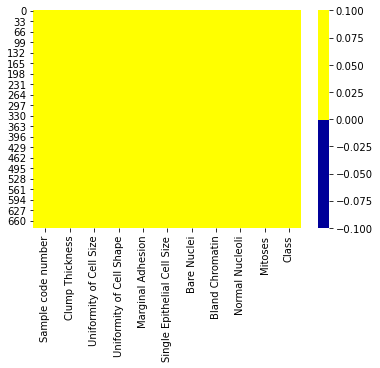

In [4]:
cols = dataset.columns
colours = ['#000099', '#ffff00'] #yellow represents not missing, blue represents missing
sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))

And from the heatmap above, we observe that there are no missing values. Even though there are no missing values, there are still a couple of steps to go through before building some models, and the first of which, is to divide the dataset into the dependent and independent variables. 

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

The above cell splits the dataset into the independent variables (X) and the dependent variable (y).

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

The dataset set has now been split into training and test sets.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature scaling has been performed on the training and test set for the dependent variables because logistic regression uses gradient descent as an optimization technique. Scaling is done to ensure that all features/variables have equal importance when the data is being fed into the model.

In [8]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)

LogisticRegression()

In the above cell, we have trained the logistic regression model using the training set data (X_train and y_train). And now, it is time to see the result/accuracy of this model.

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_LR = classifier_LR.predict(X_test)
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)

[[103   4]
 [  5  59]]


In [10]:
print(np.concatenate((y_pred_LR.reshape(len(y_pred_LR),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]

In [11]:
accuracy_score(y_test,y_pred_LR)

0.9473684210526315

Looking at the confusion matrix as well as the predicted/test set values (y_pred, y_test) above, we can observe that the model has done fairly well, producing 5 false negatives (where the model wrongly predicted that the patient's tumor was benign when it was actually malignant) and 4 false positives (where the model wrongly predicted that the tumor was malignant when it was in fact benign). The accuracy score of the model is also 94%, which is relatively high.

However, in the context of this dataset and what is normally the case in healthcare/medical data, false negatives are a lot more costly than false positives, because the former could lead to misdiagnosis or delayed diagnosis of the actual cancer, and both of which could lead to death of the patient. The number of false negatives will be something we will keep in mind as we continue with the other classification models.



In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In the above cell, we trained a K-Nearest Neighbors classifier model. n_neighbors = 5 represents the number of nearest neighbors to a test data point. What this means is that each test point will be 'judged' by its five nearest neighbor points. Let us use colors to portray an easy example. If a test point is surrounded by 3 black spots and 2 white spots, then the model will deem/predict/group the test point as a black spot too. 

By setting metric to Minkowski and p=2, we are essentially telling the KNN classifier to use the Euclidean Distance Metric formula. Minkowski distance is a generalized distance metric, and by changing the value of p, distance can be calculated in other ways, such as p=1 for Manhattan distance. But in this project, we will be using Euclidean distance. 

In [13]:
y_pred_KNN = classifier_KNN.predict(X_test)
print(np.concatenate((y_pred_KNN.reshape(len(y_pred_KNN),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]

In [14]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)
accuracy_score(y_test, y_pred_KNN)

[[103   4]
 [  5  59]]


0.9473684210526315

And it appears, by some form of sheer coincidence, KNN has the exact same accuracy and number of false positives/negatives as Logistic Regression. This means that KNN is a relatively strong model as well. 

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In the above cell, we trained a random forest classifier model. n_estimators = 10 represents the number of decision trees in the 'forest' and it makes sense to assume that the greater the number of trees, the more robust the model. We will be putting this idea to the test very soon, but for now, let's start with just 10 trees. Entropy controls how decision trees decide to split the data. Each split in the tree always aims to maximize information gain, and this means that a high amount of uncertainty/entropy is removed with each split. As more splits occur, more uncertainty/entropy is removed from the model as it closes in on a prediction.

In [16]:
y_pred_RF = classifier_RF.predict(X_test)
print(np.concatenate((y_pred_RF.reshape(len(y_pred_RF),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

In [17]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
accuracy_score(y_test, y_pred_RF)

[[102   5]
 [  6  58]]


0.935672514619883

And we can observe that the current random forest is a little worse than the logistic regression and KNN models. It had one more false positive and false negative than the other models and a slightly lower accuracy percentage. But what if we increased the number of trees? And I am sure that at this point, another question has arisen in your head: How many trees do we increase it to, and if more trees are good, why don't we just use thousands or millions of trees?

More trees mean more computational cost, and after a certain number, adding more trees benefits the model at a negligible level. Most studies seem to suggest that this number lies somewhere between 64-128. Let us see if using 125 trees will improve the model. 

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF1 = RandomForestClassifier(n_estimators = 125, criterion = 'entropy', random_state = 0)
classifier_RF1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=125, random_state=0)

In [19]:
y_pred_RF1 = classifier_RF1.predict(X_test)
print(np.concatenate((y_pred_RF1.reshape(len(y_pred_RF1),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]

In [20]:
cm_RF1 = confusion_matrix(y_test, y_pred_RF1)
print(cm_RF1)
accuracy_score(y_test, y_pred_RF1)

[[103   4]
 [  5  59]]


0.9473684210526315

And so we see that raising the number of trees allows the model to improve to the same level as the previously used KNN and logistic regression models.

## Closing Thoughts

It appears that for this dataset, linear classifiers (Logistic Regression) fared as well as or even better than the non-linear classifiers (Random Forest and KNN). This is perhaps not usually the case, and will be further investigated in future projects, so stay tuned for that! More data/ML related projects will be coming your way soon.  